# Esame Laboratorio di Programmazione II - 22/07/2025


Scrivete chiaramente sul notebook il vostro nome e matricola e rinominate il file che consegnate come `matricola.ipynb` (la matricola è SMnumeri o ECnumeri).

Per ogni funzione e metodo che richiede un campionamento rispetto ad una distribuzione settate il seed a 0: ``np.random.seed(0)``.

Stampate il risultato delle domande e consegnate il compito eseguito, quindi per cui ogni cella ha il corrispondente output.
Quindi ad esempio

e.g., 
NON scrivete: 
```python 
    lista=np.array([1,2,3])
```
ma 
```python
    lista=np.array([1,2,3]) 
    print('lista =', lista)   
```
Attenzione!Se scrivete:
```python
    lista=np.array([1,2,3])
    lista
```
``lista`` sarà l'unico ouput che si vede di quella cella

NB: Potete usare anche più di una cella python per domanda e se l'output è una matrice molto grande non dovete stamparla.

Sarà valutata anche la presentazione, ad esempio un plot senza etichette sugli assi o illeggibili sarà valutato meno bene di uno con etichette chiare.

Cercate di commmentare il compito di modo che si capisca cosa avete fatto.

Controllate attentamente di avere consegnato il file giusto.

## Esercizio 1

Crea un vettore NumPy con le seguenti spese annuali per l’auto (in euro) sostenute da 7 persone:
3200, 2750, 4100, 3600, 2950, 5100, 4400

1. Calcola la spesa totale complessiva sostenuta dal gruppo.

2. Le persone con spese minori di 3000 € ottengono una detrazione fiscale del 15%. Applica la modifica al vettore.

3. Quanto ha risparmiato il gruppo dopo la detrazione fiscale?


In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import seaborn as sns

spese = np.array([3200, 2750, 4100, 3600, 2950, 5100, 4400])

#1
tot = spese.sum()
print("Spesa totale:", tot, "euro")
#2
new_spese = np.where(spese < 3000, spese*(1-.15), spese)
print("Le spese dopo la detrazione fiscale:", new_spese)
#3
new_tot = new_spese.sum()
print("Il gruppo ha risparmiato :", tot-new_tot, "euro")

Spesa totale: 26100 euro
Le spese dopo la detrazione fiscale: [3200.  2337.5 4100.  3600.  2507.5 5100.  4400. ]
Il gruppo ha risparmiato : 855.0 euro


## Esercizio 2
1. Scrivi una funzione che simula il lancio di un dado per N volte e restituisce un array con il numero di volte che è uscita ciascuna faccia (da 1 a 6).
2. Calcolare la frequenza % con la dimensione del campione (numero di lanci) 100 volte da 10 a 5000.  Ottieni così 100 array di frequenze.
3. Fai il plot dell’andamento della frequenza media delle facce 1, 3 e 6 in funzione della dimensione del campione.



Test della funzione:  [0 0 0 0 1 0]


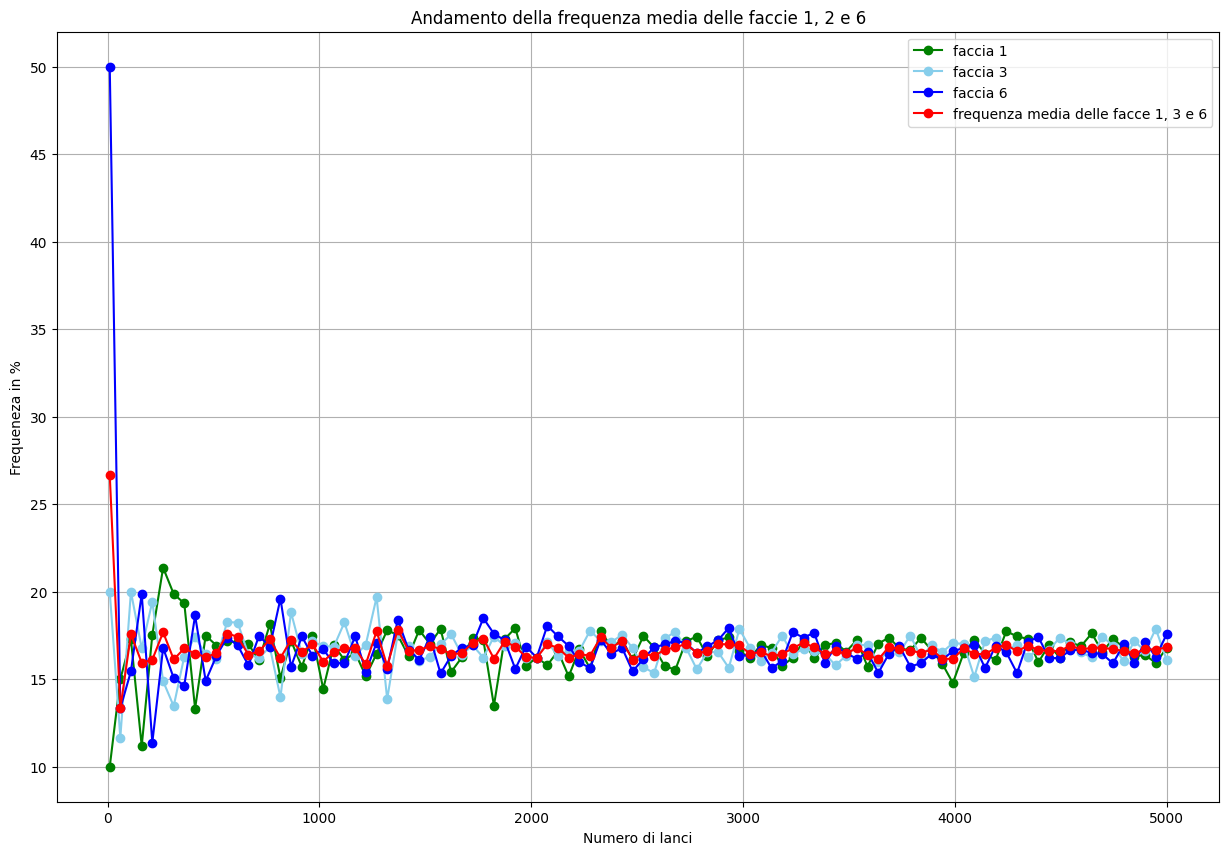

In [111]:
#1
def lancio_dado(n):
    # np.random.seed(0)
    lanci = np.random.choice([1,2,3,4,5,6], size=n)
    res = np.array([(num == lanci).sum() for num in range(1,7)])
    return res

test = lancio_dado(1)
print("Test della funzione: ", test)
#2
lanci = np.linspace(10, 5000, 100, dtype=int)
freq = np.array([lancio_dado(n)/n*100 for n in lanci])

#3
mat = freq.reshape(100, 6)
media136 = mat[:,[0,2,5]].mean(axis=1)
faccia1 = mat[:,0]
faccia3 = mat[:,2]
faccia6 = mat[:,5]
# mat
plt.figure(figsize=(15,10))
plt.plot(lanci, faccia1, label="faccia 1", color="green", marker="o")
plt.plot(lanci, faccia3, label="faccia 3", color="skyblue", marker="o")
plt.plot(lanci, faccia6, label="faccia 6", color="blue", marker="o")
plt.plot(lanci, media136, label="frequenza media delle facce 1, 3 e 6", color="red", marker="o")
plt.legend()
plt.title("Andamento della frequenza media delle faccie 1, 2 e 6")
plt.xlabel("Numero di lanci")
plt.ylabel("Frequeneza in %")
plt.grid(True)
plt.show()

## Esercizio 3

1. Genera una matrice NumPy di dimensioni 7 x 7, con valori estratti da una distribuzione normale con media = 0, ed std = 5.

2. Per ogni riga, identifica il valore più lontano da zero (cioè con valore assoluto massimo). Crea un array con questi 7 valori (uno per riga).

3. Calcola quante di queste righe hanno il valore più lontano da zero positivo?

In [115]:
#1
np.random.seed(0)

matrice = np.random.normal(loc=0, scale=5, size=(7,7))

#2
distanze = np.abs(matrice)
indexmax = distanze.argmax(axis=1)
row = np.arange(0,7)
res = matrice[row, indexmax]
print("I numeri più lontano da zero sono:", res)

#3
p = (res > 0).sum()
print("Ci sono", p, "numeri positivi")

I numeri più lontano da zero sono: [ 11.204466     7.27136753 -12.76494908  11.34877312  -9.90398234
  -7.10008969   9.75387698]
Ci sono 4 numeri positivi


## Esercizio 4 

Utilizza il dataset cereal.csv.

Contiene dati nutrizionali (proteine, fibre, calorie, zuccheri, ecc.) per circa 70 cereali.


1.  Aggiungi una colonna chiamata `nutri_score`, definita come:
$$
\texttt{nutri\_score} = \frac{\texttt{protein} + \texttt{fiber}}{\texttt{calories}}
$$

Indica quanti nutrienti positivi ci sono per ogni caloria: più è alto, più il cereale è "nutriente a parità di energia.

2. Trova i **5 cereali con il `nutri_score` più alto** e stampali con `name` e `nutri_score`.

3. Filtra i cereali che soddisfano entrambi i criteri:

   - meno di 120 calorie  
   - più di 2 grammi di fibra 


4. **Crea un grafico a barre** dei **10 cereali con il `nutri_score` più alto**, usando `name` sull’asse x.

5. Crea uno **scatter plot** (grafico a punti) che visualizzi:

   - `calories` sull’asse x  
   - `nutri_score` sull’asse y
   - `protein` nel colore dei punti


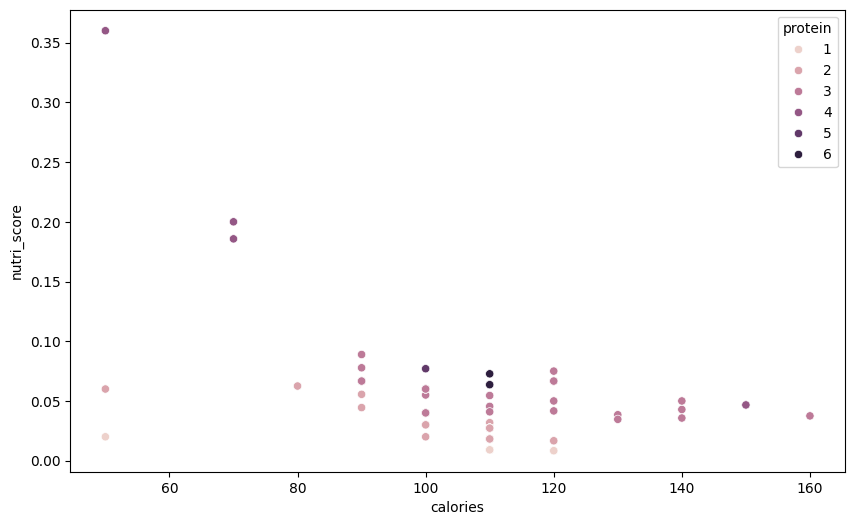

In [136]:
df = pd.read_csv("cereal.csv", sep=";")

#1
df["nutri_score"] = (df["protein"]+df["fiber"])/df["calories"]

#2
top5 = df.sort_values(by="nutri_score", ascending=False).head(5)
# print("Top 5 dei cereali con nutri_score più alto:")
# print(top5[["name", "nutri_score"]])

#3
tridf = df[(df["calories"]<120)&(df["fiber"]>2)]

#4
top10 = df.sort_values(by="nutri_score", ascending=False).head(10)

# plt.figure(figsize=(10, 6))
# sns.barplot(x="name", y="nutri_score", data=top10)
# plt.xticks(rotation=45)
# plt.title("Top 10 dei cereali con il nutri_score più alto")
# plt.show()

#5
plt.figure(figsize=(10, 6))
sns.scatterplot(x="calories", y="nutri_score", hue="protein", data=df)
plt.title("")
plt.show()

## Esercizio 5 

Utilizza il dataset `imdb_top_1000.csv`, che contiene informazioni su 1000 film recensiti su IMDB.

1. Quanti **valori mancanti** ci sono per colonna? Elimina le righe con i valori mancanti.

2. Elimina la colonna `Overview`. Aggiungi una colonna (`main_genre`) con solo il primo genere della colonna `genre`. Quali sono i 5 generi più frequenti?

3. Che attore/attrice è stato/a più volte la `Star1` e quello/a che ha fatto più film.

4. Calcola l'IMDB_rating medio e il Gross medio di ogni genere. Fai uno scatter plot dell'IMDB_rating medio e il Gross medio di ogni genere. Riesci a mettere anche l'ettichetta del genere?

5. Visualizza la distribuzione del IMDB_rating  e la distribuzione del `Gross` dei primi 5 main_genre. (Hint fai due violin plot).




In [194]:
df = pd.read_csv("imdb_top_1000 (1).csv")

#1
# print("Valori mancanti per colonna:")
# print(df.isna().sum())

#2
df.drop(columns="Overview", inplace=True) #cancelazione della colonna Overvew
df["main_genre"] = df["Genre"].apply(lambda x: x.strip().split(",")[0])
topgenere = df["main_genre"].value_counts().head(5)

#3
attore = df["Star1"].value_counts().head(1).reset_index()
# print("L'attore/attrice che è stato/a più volte la Start1 è:",attore["Star1"][0])

#4
imdb_medio = df.groupby("main_genre")["IMDB_Rating"].mean().reset_index()
gross_medio = df.groupby("main_genre")["Gross"].mean().reset_index()

# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=imdb_medio["IMDB_Rating"], y=gross_medio["Gross"], hue=gross_medio["main_genre"])
# plt.title("")
# plt.show()

#5
df_sort = df.sort_values(by="main_genre", ascending=False)
df_sort["main_genre"]

12      Western
48      Western
691     Western
115     Western
700    Thriller
         ...   
155      Action
72       Action
337      Action
217      Action
224      Action
Name: main_genre, Length: 1000, dtype: object

In [182]:
imdb_medio

Genre
Action, Adventure               8.180000
Action, Adventure, Biography    7.900000
Action, Adventure, Comedy       7.910000
Action, Adventure, Crime        7.600000
Action, Adventure, Drama        8.150000
                                  ...   
Mystery, Romance, Thriller      8.300000
Mystery, Sci-Fi, Thriller       7.800000
Mystery, Thriller               7.977778
Thriller                        7.800000
Western                         8.350000
Name: IMDB_Rating, Length: 202, dtype: float64

In [157]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,main_genre
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,Drama
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,Crime
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,Action
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,Crime
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,Crime


## Esercizio 6

Considera i seguenti dati, che :

`x = np.linspace(0, 10, 100)`  
`y = -3.5 * x + 2 + np.random.normal(0, 10, 100)`

Cerca di riprodurre la retta fittando i parametri della funzione y = ax + b.

1. Stima i parametri della retta.
2. Calcola l’intervallo di confidenza al 95% dei parametri a e b.
N.B il secondo output del metodo curve_fit è proprio la matrice di covarianza: `params, cov = curve_fit(retta, x, y)`. 
L'**errore standard** di ciascun parametro si calcola come:

$$
\text{errore\_standard}_i = \sqrt{\text{cov}(i, i)}
$$

dove $\text{cov}(i, i)$ è l'elemento diagonale $i$-esimo della **matrice di covarianza**.

L’**intervallo di confidenza al 95%** si approssima con:

$$
\text{parametro}_i \pm 1.96 \times \text{errore\_standard}_i
$$
3. Plotta i punti originali e la retta ottenuta con anche l'intervallo di confidenza